# Modèle de Machine Learning

### Algorithme utilisé
Nous utilisons ici la méthode de régression logistique pour détecter si un accident aura lieu en fonction des paramètres.
Le modèle est entrainé sur 80% du dataset. Il est ensuite testé les 20% restants.

### Interprétation des résultats
Le modèle possède une précision élevée (87%)
Les courbes d'apprentissage sont cohérentes et montrent une amélioration du modèle constante au fil de l'entrainement.

In [3]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Charger les données à partir du fichier CSV
data = pd.read_csv('dataset_accidents.csv', sep=',')

# Convertir les chaînes de caractères JSON en listes de nombres
data['Vitesse'] = data['Vitesse'].apply(lambda x: json.loads(x))
data['Pluie'] = data['Pluie'].apply(lambda x: json.loads(x))

# Aplatir les listes de nombres en colonnes individuelles
data = pd.concat([data.drop(['Vitesse', 'Pluie'], axis=1), data['Vitesse'].apply(pd.Series), data['Pluie'].apply(pd.Series)], axis=1)

# Diviser les données en caractéristiques (X) et la cible (y)
X = data.drop('Accident', axis=1)
y = data['Accident']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Effectuer des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle:", accuracy)


Précision du modèle: 0.8635


Précision du modèle: 0.8635


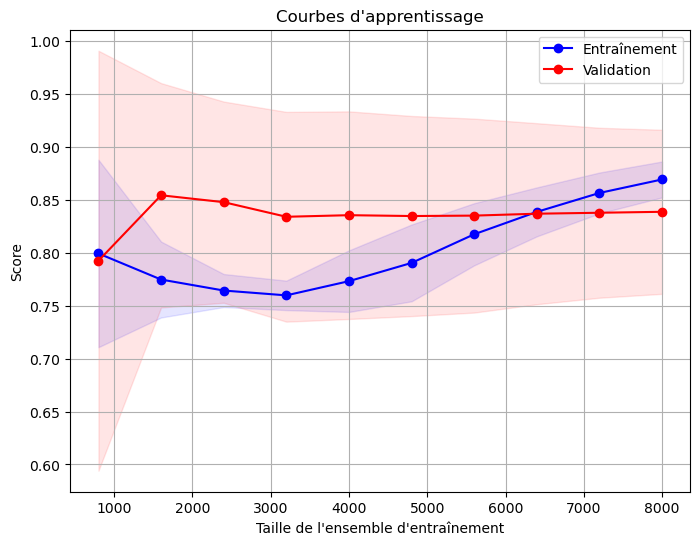

In [4]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Charger les données à partir du fichier CSV
data = pd.read_csv('dataset_accidents.csv', sep=',')

# Convertir les chaînes de caractères JSON en listes de nombres
data['Vitesse'] = data['Vitesse'].apply(lambda x: json.loads(x))
data['Pluie'] = data['Pluie'].apply(lambda x: json.loads(x))

# Aplatir les listes de nombres en colonnes individuelles
data = pd.concat([data.drop(['Vitesse', 'Pluie'], axis=1), data['Vitesse'].apply(pd.Series), data['Pluie'].apply(pd.Series)], axis=1)

# Diviser les données en caractéristiques (X) et la cible (y)
X = data.drop('Accident', axis=1)
y = data['Accident']

# Créer un pipeline avec une mise à l'échelle des caractéristiques et un modèle de régression logistique
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Définir les tailles des ensembles d'entraînement pour les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculer les moyennes et écarts-types des scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle:", accuracy)

# Afficher les courbes d'apprentissage
plt.figure(figsize=(8, 6))
plt.title('Courbes d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validation')
plt.legend(loc='best')
plt.show()
